In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
# supplement
from tqdm import tqdm_notebook
import scipy.io as sio
import glob 
# tools
from tools import transform, visualize

In [10]:
# ALGORITHM TO CLASSIFY BEHAVIOR
data_path_list = glob.glob('data/*')

# specified parameter
num_bp = 30 # number of body point labeled
origin_bp = 2 # origin body point to center animal
axis_bp = 1 # other body point to form an axis w/ origin body point
delete_bp = (origin_bp) # should always delete origin bp; can add other bp to list

for data_path in tqdm_notebook(data_path_list):
    dir_name = os.path.basename(data_path) # specific directory name in data folder
    
    # convert body point h5 to numpy
    bp_path = glob.glob(data_path+'/*.h5')[0]
    bp_h5data = pd.read_hdf(bp_path)
    bp_data = bp_h5data[ bp_h5data.keys().levels[0][0] ].values # converts h5 to npy
    # reformat numpy body point data
    num_frame = bp_data.shape[0]
    bp_data = np.delete( bp_data.reshape( num_frame,num_bp,-1 ), obj=-1, axis=2 ) # reformats data and takes out last prob varaiable
    bp_data = np.swapaxes(bp_data.T,0,1) # num_bp x num_coord x t
    # get camera position
    cam_path = glob.glob(data_path+'/*.npy')[0]
    cam_data = np.load(cam_path)
    # translate data w/ respect to origin
    (bp_data, trans_data) = transform.translational(bp_data, origin_bp)
    # rotate data w/ respect to body axis
    (bp_data, rot_data) = transform.rotational(bp_data, axis_bp)
    # visualize transformed body points
#     visualize.ant_bp_graph(bp_data, frame=600)
    
    # delete unwanted body points
    bp_mod = np.delete( bp_data,delete_bp,0 )
    # reshape body point to [N_frame x features] for spectrogram
    num_relevant_bp, num_axis = bp_mod.shape[0], bp_mod.shape[1]
    bp_data_mod = bp_mod.reshape( num_relevant_bp*num_axis,-1 ).T 
    # subtract mean for each bp for spectrogram analysis
    bp_data_mod = bp_data_mod - np.mean(bp_data_mod, axis=0)
    
    # save data
    np.save(data_path+"/BP_"+dir_name, bp_data)
    np.save(data_path+"/TRANS_"+dir_name, trans_data)
    np.save(data_path+"/ROT_"+dir_name, rot_data)
    sio.savemat( data_path+"/MAT_"+dir_name+".mat",{"projections":bp_data_mod} )

    print("number of frames: ", num_frame)
    print("datapath: ", data_path)
    print("directory: ", dir_name)
    print("body point data: ", bp_data.shape)
    print("camera data: ", cam_data.shape)
    print("spectrogram data: ", bp_data_mod.shape)
    print("*********************************************")
    

number of frames:  2878
datapath:  data/20181029_ant2_trail1
directory:  20181029_ant2_trail1
body point data:  (30, 2, 2878)
camera data:  (2878,)
spectrogram data:  (2878, 58)
*********************************************
number of frames:  12517
datapath:  data/20181008_Pd_trail
directory:  20181008_Pd_trail
body point data:  (30, 2, 12517)
camera data:  (2, 12517)
spectrogram data:  (12517, 58)
*********************************************
number of frames:  9034
datapath:  data/20181018_ant3_trail1
directory:  20181018_ant3_trail1
body point data:  (30, 2, 9034)
camera data:  (9034,)
spectrogram data:  (9034, 58)
*********************************************



<h1><center>TEST</center></h1>

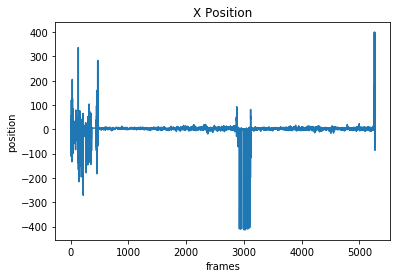

X mean: -0.0


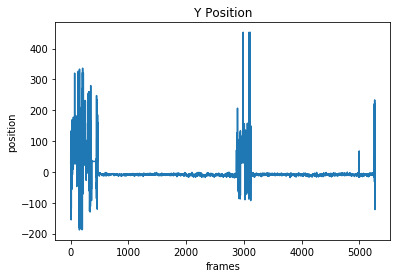

Y mean: 0.0


In [12]:
# X Position
bp_x = 4
plt.plot(bp_test_mod[:,bp_x])
plt.xlabel("frames")
plt.ylabel("position")
plt.title("X Position")
plt.show()
print("X mean: " + str(round(np.mean(bp_test_mod[:,bp_x]), 4)))
# Y Position
bp_y = 5
plt.plot(bp_test_mod[:,bp_y])
plt.xlabel("frames")
plt.ylabel("position")
plt.title("Y Position")
plt.show()
print("Y mean: " + str(round(np.mean(bp_test_mod[:,bp_y]), 4)))

In [3]:
trans_data = np.load("data/bpdata_npy/trans_20181005_dP_trailDeepCut_resnet50_AntJan3shuffle1_1030000.npy")

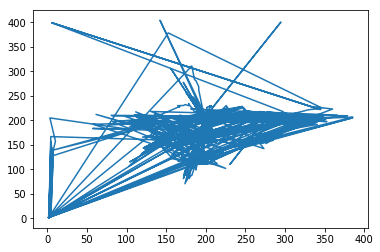

In [4]:
plt.plot(trans_data[0,:], trans_data[1,:])
plt.show()

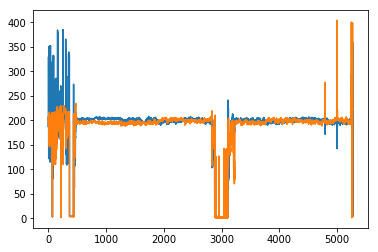

In [5]:
plt.plot(trans_data.T)

In [7]:
test = np.load("tr_cms.npy")

In [8]:
test.shape

(27425, 2)

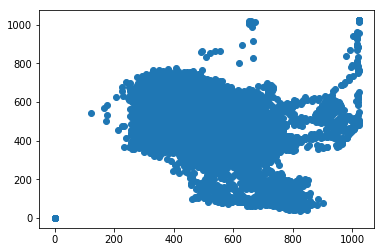

In [10]:
plt.scatter(test[:,0], test[:,1])

In [29]:
import pandas as pd
import h5py as h5py

In [30]:
f = h5py.File('trail_1.h5', 'r')

In [31]:
list(f.keys())

['app', 'hardware', 'measurement']

In [39]:
dset_app = f['app']
dset_hard = f['hardware']
dset_measurement = f['measurement']

In [66]:
dset_measurement.keys()

<KeysViewHDF5 ['ant_watch']>

In [70]:
dset_measurement['ant_watch'].keys()

<KeysViewHDF5 ['buffer', 'settings']>

In [89]:
dset_measurement['ant_watch']['settings']['units'].keys()

<KeysViewHDF5 []>

In [91]:
data = np.array(dset_measurement['ant_watch']['buffer'])

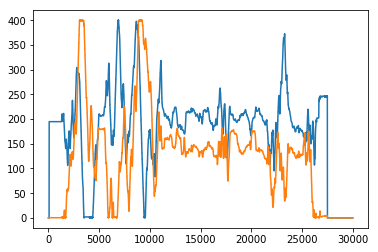

In [97]:
plt.plot(data)

In [98]:
data.shape

(30000, 2)